In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import numpy as np
import pandas as pd
import operator
import json
import re

In [ ]:
url = 'https://raw.githubusercontent.com/Ashwin-19/HW3/master/preprocessed.csv?token=AJD3RIRNM5ZVZ3QSBLWE4T26PTZ32'
Dataset = pd.read_csv(url,error_bad_lines=False,lineterminator='\n')

In [ ]:
Dataset.head()

,Unnamed: 0,id,conversation_id,created_at,date,timezone,tweet,hashtags,user_id,user_id_str,username,name,day,hour,link,retweet,nlikes,nreplies,nretweets,quote_url,reply_to,plabel,ilabel,followers,following,bio,verified,age,user_location,sentiment
0,0,1.235145e+18,1.235145e+18,1583316412000,2020-03-04 10:06:52,UTC,#DelhiViolance: Cops arrest man seen firing in...,"['#delhiviolance', '#jaffrabad', '#savedelhihi...",1.057575e+18,1.057575e+18,news_khulasa,Khulasa News,6,10,https://twitter.com/news_khulasa/status/123514...,False,1,0,0,NaN,"[{'user_id': '1057575335280046080', 'username'...",report,fact,1517.0,1491.0,Official Twitter account of khulasa-news. We p...,0.0,506.0,NaN,-0.05
1,1,1.234889e+18,1.234747e+18,1583255487000,2020-03-03 17:11:27,UTC,Police have asked people to don't come but the...,[],2.159009e+08,2.159009e+08,annuu143,annu kumar singh,1,6,https://twitter.com/annuu143/status/1234889136...,False,0,4,0,NaN,"[{'user_id': '215900941', 'username': 'annuu14...",other,chaos,10.0,55.0,NaN,0.0,3414.0,NaN,0.25
2,2,1.234812e+18,1.234812e+18,1583237170000,2020-03-03 12:06:10,UTC,"Mohammed Shahrukh, the man who aimed a gun at ...","['#delhiviolence', '#uttarpradesh']",2.264849e+09,2.264849e+09,LogicalIndians,The Logical Indian,6,6,https://twitter.com/LogicalIndians/status/1234...,False,15,2,2,NaN,"[{'user_id': '2264849412', 'username': 'Logica...",report,fact,81439.0,1967.0,"Handpicked, newsworthy stories which deserve t...",1.0,2275.0,India,0.00
3,3,1.234798e+18,1.234798e+18,1583233754000,2020-03-03 11:09:14,UTC,Delhi shooter Shahrukh (not @iamsrk )who point...,[],7.502518e+07,7.502518e+07,Mohit4Nation,Mohit Saxena,1,17,https://twitter.com/Mohit4Nation/status/123479...,False,0,0,0,NaN,"[{'user_id': '75025176', 'username': 'Mohit4Na...",praise,fact,104.0,98.0,NATIONALIST| STRATEGIST| FOLLOWS THE PRINCIPLE...,0.0,3837.0,India,0.00
4,4,1.234739e+18,1.234739e+18,1583219760000,2020-03-03 7:16:00,UTC,Ab iski tabiyat se kutai karein @DelhiPolice \...,[],7.815867e+17,7.815867e+17,kalpana0402,🕉 𝕮𝖔𝖚𝖈𝖍 𝕻𝖔𝖙𝖆𝖙𝖔 🇮🇳,7,18,https://twitter.com/kalpana0402/status/1234739...,False,1,0,0,NaN,"[{'user_id': '781586734823845892', 'username':...",action,fact,480.0,352.0,🇮🇳Nationalist|Hindu|Bibliophile/Melophile| Pur...,0.0,1268.0,NaN,0.00


In [ ]:
# Regular Expressions
link_re = "https\S+"
phone_re = "^[6-9]\d{9}$"
vehicle_re = "^[A-Z]{2}[ -][0-9]{1,2}(?: [A-Z])?(?: [A-Z]*)? [0-9]{4}$"
email_re = "^([a-zA-Z0-9_\-\.]+)@([a-zA-Z0-9_\-\.]+)\.([a-zA-Z]{2,5})$"

accounts = np.array(Dataset['username']) 
tweets = np.array(Dataset['tweet'])
bios = np.array(Dataset['bio'])

PII = []

for index in range(tweets.shape[0]):
  
  tweet = tweets[index]
  bio = bios[index]
  
  if tweet != np.nan and tweet != '':
    
    out = re.search(phone_re,tweet)
    if out != None:
      PII.append(out.group(0))
    
    out = re.search(vehicle_re,tweet)
    if out != None:
      PII.append(out.group(0))
    
    out = re.search(email_re,tweet)
    if out != None:
      PII.append(out.group(0))
  
  if bio != np.nan and bio != '' and isinstance(bio,str):

    out = re.findall(link_re,bio)
    PII += out
    
    out = re.search(phone_re,bio)
    if out != None:
      PII.append(out.group(0))
    
    out = re.search(vehicle_re,bio)
    if out != None:
      PII.append(out.group(0))
    
    out = re.search(email_re,bio)
    if out != None:
      PII.append(out.group(0))

if len(PII) == 0:
  print("No PII were found.")
else:
  print("Detected PII:",PII)

Detected PII: ['https://t.co/q4lMD0QH38', 'https://t.co/oVYIKtmkC', 'https://www.instagram.com/guljar.ali.5688/', 'https://www.facebook.com/guljar.ali.5688', 'https://www.instagram.com/katariyaashish4', 'https://mylyoublo.blogspot.com']


In [ ]:
def convert(stringlist):
  out = list(stringlist.strip('"]["').split("','")[0].split(', '))
  out = [item[1:-1] for item in out]
  return np.array(out)

hashtags = np.array(Dataset['hashtags'])
hashtags = np.array([convert(item) for item in hashtags])
hashtags = np.hstack(hashtags)

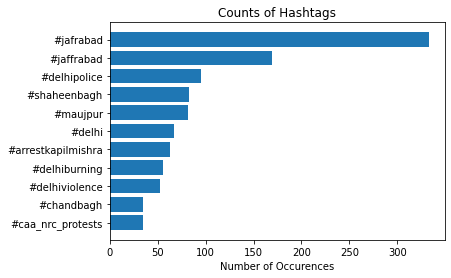

In [ ]:
hashtags = {i:list(hashtags).count(i) for i in set(hashtags)}
hashtags.pop('')

sorted_hashtags = sorted(hashtags.items(), key=operator.itemgetter(1))
sorted_hashtags = sorted_hashtags[-11:]
text_hashtags = [x[0] for x in sorted_hashtags]
x_hashtags = [i for i in range(1,11,1)]
y_hashtags = [x[1] for x in sorted_hashtags]

plt.barh(text_hashtags, y_hashtags)
plt.xlabel('Number of Occurences')
plt.title('Counts of Hashtags')
plt.show()

In [ ]:
def clean_tweet(tweet):
  text = re.sub(r"pic.twitter\S+", "", tweet)
  text = re.sub(r"#\S+", "", text)
  text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", str(text)).split())
  return text

def join_tweets(tweets):
  tweet_text = ''    
  for tweet in tweets:
    tweet_text += clean_tweet(tweet)
  return tweet_text

tweets = Dataset['tweet']
tweets_text = join_tweets(tweets)

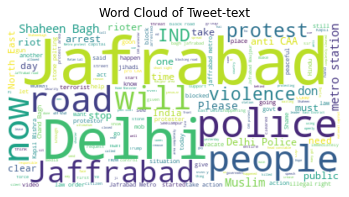

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

def make_word_cloud(tweet_text, stopwords):        
    
    # Generate a word cloud image
    wordcloud = WordCloud(background_color="white",
               stopwords=stopwords).generate(tweet_text)

    # Display the generated image:
    plt.title('Word Cloud of Tweet-text')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

stopwords = set(STOPWORDS)
stopwords.add('https')
stopwords.add('CO')

make_word_cloud(tweets_text, stopwords)

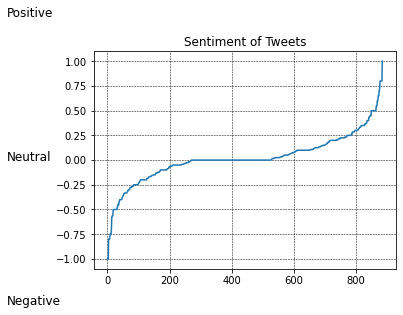

In [ ]:
sentiments = list(Dataset['sentiment'])
sentiments.sort()
x = [i for i in range(len(sentiments))]
plt.title('Sentiment of Tweets')
plt.grid(color='black', linestyle='dashed', linewidth=0.5)
plt.plot(x,sentiments)
plt.gcf().text(0, 1, "Positive", fontsize=12)
plt.gcf().text(0, 0.5, "Neutral", fontsize=12)
plt.gcf().text(0, 0, "Negative", fontsize=12)
plt.subplots_adjust(left=0.2)
plt.show()

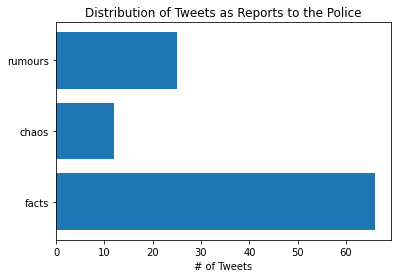

In [ ]:
Reports = Dataset[Dataset['plabel']=='report']

n_facts = len(Reports[Reports['ilabel']=='fact'].index)
n_chaos = len(Reports[Reports['ilabel']=='chaos'].index)
n_rumour = len(Reports[Reports['ilabel']=='rumour'].index)

x = ['facts','chaos','rumours']
y = [n_facts,n_chaos,n_rumour]

plt.barh(x, y)
plt.xlabel('# of Tweets')
plt.title('Distribution of Tweets as Reports to the Police')
plt.show()

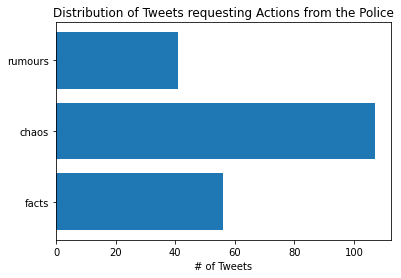

In [ ]:
Actions = Dataset[Dataset['plabel']=='action']

n_facts = len(Actions[Actions['ilabel']=='fact'].index)
n_chaos = len(Actions[Actions['ilabel']=='chaos'].index)
n_rumour = len(Actions[Actions['ilabel']=='rumour'].index)

x = ['facts','chaos','rumours']
y = [n_facts,n_chaos,n_rumour]

plt.barh(x, y)
plt.xlabel('# of Tweets')
plt.title('Distribution of Tweets requesting Actions from the Police')
plt.show()

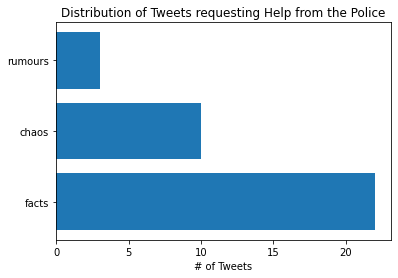

In [ ]:
Helps = Dataset[Dataset['plabel']=='help']

n_facts = len(Helps[Helps['ilabel']=='fact'].index)
n_chaos = len(Helps[Helps['ilabel']=='chaos'].index)
n_rumour = len(Helps[Helps['ilabel']=='rumour'].index)

x = ['facts','chaos','rumours']
y = [n_facts,n_chaos,n_rumour]

plt.barh(x, y)
plt.xlabel('# of Tweets')
plt.title('Distribution of Tweets requesting Help from the Police')
plt.show()

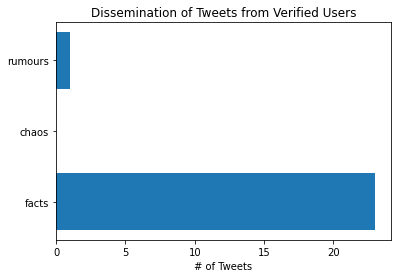

In [ ]:
verified = Dataset[Dataset['verified']==1]

n_facts = len(verified[verified['ilabel']=='fact'].index)
n_chaos = len(verified[verified['ilabel']=='chaos'].index)
n_rumour = len(verified[verified['ilabel']=='rumour'].index)

x = ['facts','chaos','rumours']
y = [n_facts,n_chaos,n_rumour]

plt.barh(x, y)
plt.xlabel('# of Tweets')
plt.title('Dissemination of Tweets from Verified Users')
plt.show()

In [ ]:
user = verified[verified['ilabel']=='rumour']
print(user[['name','followers','following']])
print('Tweet:',np.array(user['tweet'])[0])
print('Text:',np.array(user['bio'])[0])

                                 name  followers  following
518  Suresh Nakhua 🇮🇳 ( सुरेश नाखुआ )   107105.0     4020.0
Tweet: . @MirchiSayema mobilized rioters in Jafrabad- Maujpur area, place where Shahrukh was found firing at @DelhiPolice and a policeman was murdered by anti nationals.  pic.twitter.com/vYnbJG16kP
Text: Spokesperson, BJP Mumbai |  Digital Marketing Consultant |  Views Personal | RT, Like ≠ Endorsement  Insta : https://t.co/q4lMD0QH38 FB : https://t.co/oVYIKtmkC


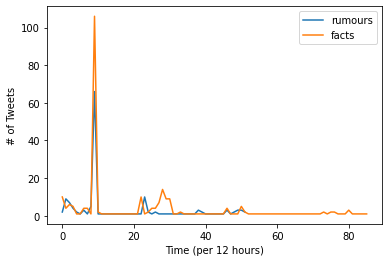

In [ ]:
rumours = list(Dataset[Dataset['ilabel']=='rumour']['date'])
facts = list(Dataset[Dataset['ilabel']=='fact']['date'])
rumours.sort()
facts.sort()

rumour_stamps = [0]
start_time = datetime(2020,2,23,0,0,0)
for rumour in rumours:
  timestamp = datetime.strptime(rumour,'%Y-%m-%d %H:%M:%S')
  if timestamp <= start_time + timedelta(hours=12):
    rumour_stamps[-1] += 1
  else:
    diff = ((timestamp - start_time).seconds//3600)//12
    rumour_stamps += [0]*diff
    start_time += timedelta(hours=diff)
    rumour_stamps[-1] += 1


fact_stamps = [0]
start_time = datetime(2020,2,23,0,0,0)
for fact in facts:
  timestamp = datetime.strptime(fact,'%Y-%m-%d %H:%M:%S')
  if timestamp <= start_time + timedelta(hours=12):
    fact_stamps[-1] += 1
  else:
    diff = ((timestamp - start_time).seconds//3600)//12
    fact_stamps += [0]*diff
    start_time += timedelta(hours=diff)
    fact_stamps[-1] += 1

x1 = [x for x in range(len(rumour_stamps))]
x2 = [x for x in range(len(fact_stamps))]

plt.plot(x1,rumour_stamps,label='rumours')
plt.plot(x2,fact_stamps,label='facts')
plt.xlabel('Time (per 12 hours)')
plt.ylabel('# of Tweets')
plt.legend(loc='best')
plt.show()